<a href="https://colab.research.google.com/github/VitorGama10/Avan-ando_Machine_Learning_/blob/main/Machine_Learning_Otimiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size=15, color ='orange'>Melhor estimator para o meu modelo
<hr style='border: 2x solid red;'>

Nesse processo vamos escolher os melhores estimatores para a arvore de Decisão

# Instalando arvore de Decisão

In [73]:
!pip install graphviz==0.9
!pip install pydot

!apt-get install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


# Importando dados

In [74]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [75]:
x = dados[["preco", "idade_do_modelo","km_por_ano"]] # Oq a gente quer analisar
y = dados["vendido"] # Aqui nossa classificação

## Simulando os dados 

In [76]:
dados_azar = dados.sort_values('vendido', ascending = True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]] # Oq a gente quer analisar
y_azar = dados_azar["vendido"] # Aqui nossa classificação
dados_azar.head()

# simulamos isso pra ver oque acontece, se treina a metade e testa a outra metade com certeza ai sair ruim o resultado 

# veio uma ordem incorreta para nosso modelo

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


## DUMMYCLASSIFIER

In [77]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
import numpy as np 

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()

results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score = False) # cv 3 testou 3 vezes o teste
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std() # o quanto desvia da media 

print('Accuracy com cross_validate [%.2f%% %.2f%%]' % ((media - 2 * desvio_padrao) *100, (media + 2 * desvio_padrao)*100))

Accuracy com cross_validate [58.00% 58.00%]


## Cross_Validate 
### Arvore de Decisão

In [78]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth = 2)

# cross validate 
results = cross_validate(modelo, x_azar, y_azar, cv = 5, return_train_score = False) # cv 3 testou 3 vezes o teste
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std() # o quanto desvia da media 

print('Accuracy com cross_validate [%.2f%% %.2f%%]' % ((media - 2 * desvio_padrao) *100, (media + 2 * desvio_padrao)*100))

Accuracy com cross_validate [74.38% 77.18%]


## Selecionando modelo de carros

In [79]:
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [80]:
def imprime_resultados(results):
  media = results['test_score'].mean()*100
  desvio_padrao = results['test_score'].std()*100
  
  print('Accuracy médio %.2f%%' % media)
  print('Intervalo [%.2f%% %.2f%%]' % (media - 2 * desvio_padrao, media + 2 * desvio_padrao))

In [81]:
imprime_resultados(results)

Accuracy médio 75.78%
Intervalo [74.38% 77.18%]


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)

In [83]:
imprime_resultados(results)

Accuracy médio 76.68%
Intervalo [74.28% 79.08%]


In [84]:
from sklearn.model_selection import GroupKFold

SEED = 300
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3) # tamanho da decisao

results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False) # Agrupa por modelo

imprime_resultados(results)

Accuracy médio 78.67%
Intervalo [76.40% 80.94%]


# Importando arvore de Decisão

> 



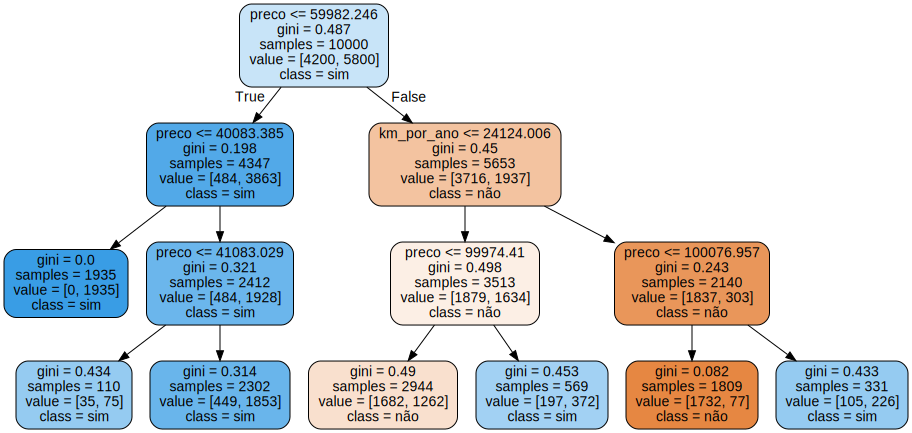

In [85]:
from sklearn.tree import export_graphviz
import graphviz

# Agora queremos usar no mundo real
modelo.fit(x_azar, y_azar)
feature = x_azar.columns
                        #  joga nenhum arquivo
dot_data = export_graphviz(modelo, out_file=None, filled = True, rounded = True, class_names=['não', 'sim'], feature_names= feature)
                                        # filled ---> preencher os retangulos de visualização

graph = graphviz.Source(dot_data)
graph

## Arvore de Decisão com 3 

In [86]:
from sklearn.model_selection import GroupKFold

SEED = 300
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3) # tamanho da decisao

results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False) # Agrupa por modelo

imprime_resultados(results)

Accuracy médio 78.67%
Intervalo [76.40% 80.94%]


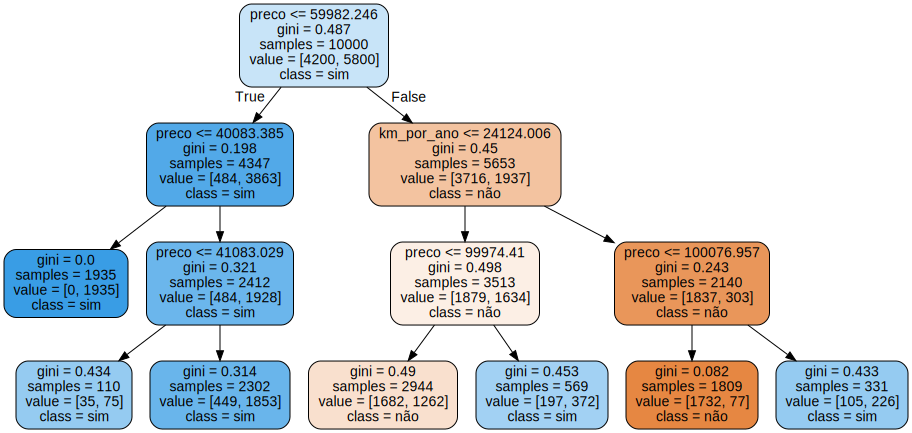

In [87]:
# Agora queremos usar no mundo real
modelo.fit(x_azar, y_azar)
feature = x_azar.columns
                        #  joga nenhum arquivo
dot_data = export_graphviz(modelo, out_file=None, filled = True, rounded = True, class_names=['não', 'sim'], feature_names= feature)
                                        # filled ---> preencher os retangulos de visualização

graph = graphviz.Source(dot_data)
graph

# Explorando hiper parâmetros em uma dimensão

In [88]:
def roda_arvore_de_decisao(max_depth):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth) # tamanho da decisao

  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False) # Agrupa por modelo

# pegou a media dos resultados de cada arvore de decisão
  print('max_depth = %d, media = %.2f' % (max_depth, results['test_score'].mean() * 100))

for i in range(1, 33): # Vai escolher do 1 até o 33
  roda_arvore_de_decisao(i)


max_depth = 1, media = 75.78
max_depth = 2, media = 75.78
max_depth = 3, media = 78.67
max_depth = 4, media = 78.63
max_depth = 5, media = 78.56
max_depth = 6, media = 78.12
max_depth = 7, media = 77.96
max_depth = 8, media = 77.86
max_depth = 9, media = 77.38
max_depth = 10, media = 77.19
max_depth = 11, media = 76.97
max_depth = 12, media = 76.49
max_depth = 13, media = 75.81
max_depth = 14, media = 75.66
max_depth = 15, media = 75.16
max_depth = 16, media = 75.11
max_depth = 17, media = 74.74
max_depth = 18, media = 74.33
max_depth = 19, media = 74.34
max_depth = 20, media = 74.22
max_depth = 21, media = 73.80
max_depth = 22, media = 73.81
max_depth = 23, media = 73.38
max_depth = 24, media = 73.43
max_depth = 25, media = 73.14
max_depth = 26, media = 73.04
max_depth = 27, media = 72.91
max_depth = 28, media = 72.66
max_depth = 29, media = 72.73
max_depth = 30, media = 72.81
max_depth = 31, media = 72.86
max_depth = 32, media = 72.52


# Imprimindo o treino com o teste

In [89]:
def roda_arvore_de_decisao(max_depth):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth) # tamanho da decisao

  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True) # Agrupa por modelo

  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

# pegou a media dos resultados de cada arvore de decisão
  print('max_depth = %d, treino = %.2f teste = %.2f' % (max_depth, train_score, test_score))

  tabela = [max_depth, train_score, test_score]

  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1, 33)] # Vai escolher do 1 até o 33

# transformando em data frame
resultados = pd.DataFrame(resultados, columns = ['max_depth', 'treino', 'teste'])

max_depth = 1, treino = 75.79 teste = 75.78
max_depth = 2, treino = 75.79 teste = 75.78
max_depth = 3, treino = 78.75 teste = 78.67
max_depth = 4, treino = 78.79 teste = 78.63
max_depth = 5, treino = 78.94 teste = 78.56
max_depth = 6, treino = 79.17 teste = 78.12
max_depth = 7, treino = 79.50 teste = 77.96
max_depth = 8, treino = 79.89 teste = 77.86
max_depth = 9, treino = 80.46 teste = 77.38
max_depth = 10, treino = 81.16 teste = 77.19
max_depth = 11, treino = 82.03 teste = 76.97
max_depth = 12, treino = 82.89 teste = 76.49
max_depth = 13, treino = 83.95 teste = 75.81
max_depth = 14, treino = 85.03 teste = 75.66
max_depth = 15, treino = 86.14 teste = 75.16
max_depth = 16, treino = 87.19 teste = 75.11
max_depth = 17, treino = 88.31 teste = 74.74
max_depth = 18, treino = 89.26 teste = 74.33
max_depth = 19, treino = 90.32 teste = 74.34
max_depth = 20, treino = 91.32 teste = 74.22
max_depth = 21, treino = 92.14 teste = 73.80
max_depth = 22, treino = 93.02 teste = 73.81
max_depth = 23, tre

### Podemos trabalhar com essa variaveis agora

In [90]:
resultados.head()

,max_depth,treino,teste
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


# OVERFIT: ficou **perfeito** para o treino mas **ruim** para o teste

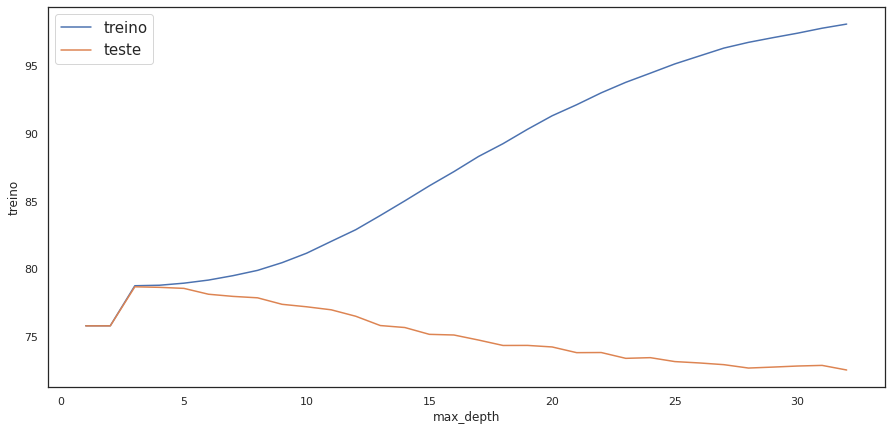

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 7))
sns.lineplot(data = resultados, x = 'max_depth', y = 'treino')
sns.lineplot(data = resultados, x = 'max_depth', y = 'teste')

plt.legend(['treino', 'teste'], fontsize = 15)

## Explorando hiper parametros em 2 dimensões

In [92]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf=min_samples_leaf) # tamanho da decisao

  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True) # Agrupa por modelo

  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

# pegou a media dos resultados de cada arvore de decisão
  print('max_depth = %d, min_samples_leaf = %d, treino = %.2f teste = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))

  tabela = [max_depth, min_samples_leaf, train_score, test_score]

  return tabela

def busca():
  resultados = []
  for max_depth in range(1, 33):
      for min_samples_leaf in [128, 192, 256, 512]:

        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)

  # transformando em data frame
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'treino', 'teste'])
  return resultados

resultados = busca()
resultados.head()

max_depth = 1, min_samples_leaf = 128, treino = 75.79 teste = 75.78
max_depth = 1, min_samples_leaf = 192, treino = 75.79 teste = 75.78
max_depth = 1, min_samples_leaf = 256, treino = 75.79 teste = 75.78
max_depth = 1, min_samples_leaf = 512, treino = 75.79 teste = 75.78
max_depth = 2, min_samples_leaf = 128, treino = 75.79 teste = 75.78
max_depth = 2, min_samples_leaf = 192, treino = 75.79 teste = 75.78
max_depth = 2, min_samples_leaf = 256, treino = 75.79 teste = 75.78
max_depth = 2, min_samples_leaf = 512, treino = 75.79 teste = 75.78
max_depth = 3, min_samples_leaf = 128, treino = 78.75 teste = 78.67
max_depth = 3, min_samples_leaf = 192, treino = 78.75 teste = 78.67
max_depth = 3, min_samples_leaf = 256, treino = 78.75 teste = 78.67
max_depth = 3, min_samples_leaf = 512, treino = 77.53 teste = 77.50
max_depth = 4, min_samples_leaf = 128, treino = 78.75 teste = 78.67
max_depth = 4, min_samples_leaf = 192, treino = 78.75 teste = 78.67
max_depth = 4, min_samples_leaf = 256, treino = 

,max_depth,min_samples_leaf,treino,teste
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


## Os melhores resultados 

In [93]:
resultados.sort_values('teste', ascending=False).head()

,max_depth,min_samples_leaf,treino,teste
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


In [94]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,treino,teste
max_depth,1.000000e+00,6.863211e-17,0.354588,0.240852
min_samples_leaf,6.863211e-17,1.000000e+00,-0.637649,-0.440661
treino,3.545878e-01,-6.376494e-01,1.000000,0.909222
teste,2.408525e-01,-4.406611e-01,0.909222,1.000000


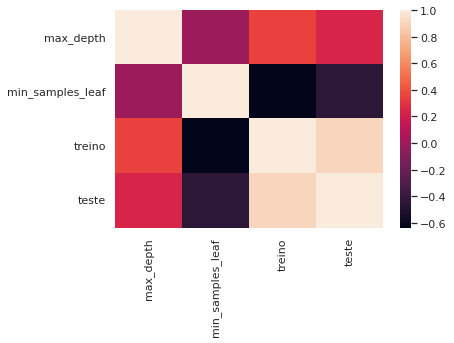

In [95]:
sns.heatmap(corr)

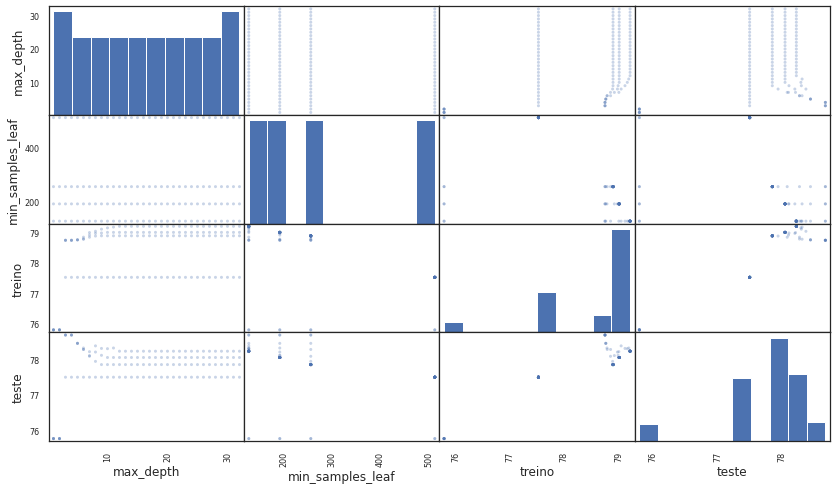

In [96]:
import pandas as pd
ax = pd.plotting.scatter_matrix(resultados, figsize= (14,8), alpha = 0.3)
ax = ax

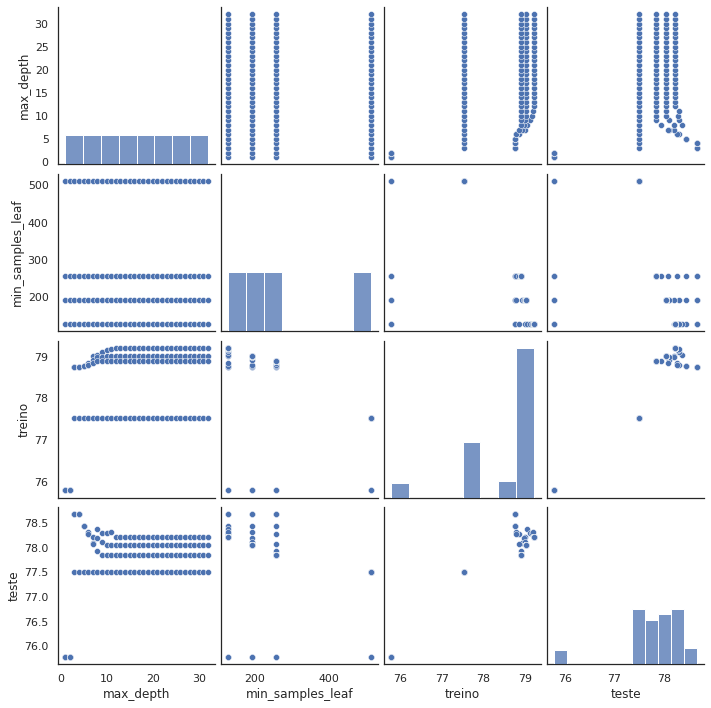

In [97]:
sns.pairplot(resultados)

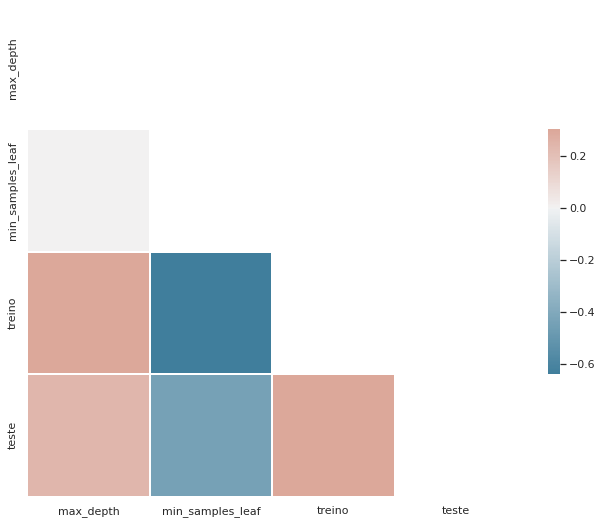

In [98]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Explorando 3 dimensões

In [99]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split) # tamanho da decisao

  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True) # Agrupa por modelo
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()

  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

# pegou a media dos resultados de cada arvore de decisão
#  print('max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, treino = %.2f teste = %.2f' % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]

  return tabela

def busca():
  resultados = []
  for max_depth in range(1, 33):
      for min_samples_leaf in [128, 192, 256, 512]:
          for min_samples_split in [32, 64, 128, 256]:

             tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
             resultados.append(tabela)

  # transformando em data frame
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'min_samples_split', 'treino', 'teste', 'fit_time', 'score_time'])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,treino,teste,fit_time,score_time
0,1,128,32,75.791169,75.784219,0.005923,0.001783
1,1,128,64,75.791169,75.784219,0.005985,0.002053
2,1,128,128,75.791169,75.784219,0.005975,0.001776
3,1,128,256,75.791169,75.784219,0.005897,0.001748
4,1,192,32,75.791169,75.784219,0.005966,0.001736


In [100]:
corr = resultados.corr()

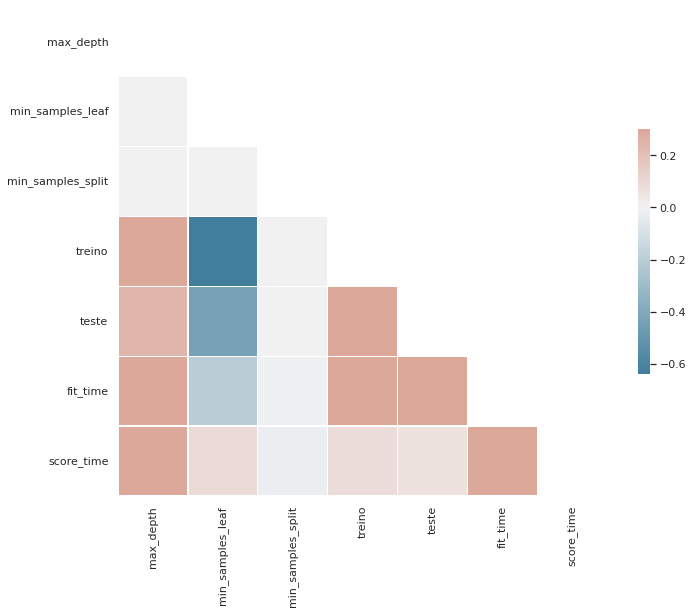

In [101]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [102]:
resultados.sort_values('teste', ascending = False).head()

,max_depth,min_samples_leaf,min_samples_split,treino,teste,fit_time,score_time
54,4,192,128,78.750993,78.672633,0.012523,0.001985
55,4,192,256,78.750993,78.672633,0.012854,0.002097
32,3,128,32,78.750993,78.672633,0.011532,0.002230
33,3,128,64,78.750993,78.672633,0.011172,0.002084
34,3,128,128,78.750993,78.672633,0.010838,0.002121


#Explorando espaço de hiper parâmetros com GridSearchCV

<font color='red'>Buscou o melhor resultado para o meu modelo

In [105]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    'max_depth': [3, 5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32,64,128],
    'criterion': ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros, 
                     cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar, groups = dados.modelo)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012310,0.001717,0.002414,0.000738,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.011498,0.000804,0.002079,0.000105,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.011097,0.000260,0.002032,0.000051,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.011328,0.000621,0.002055,0.000067,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.010957,0.000172,0.002093,0.000187,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [113]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


## Melhor modelo ?

In [116]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [117]:
from sklearn.metrics import accuracy_score

# evitar essa abordagem pois estara sendo otimista
previsoes = melhor.predict(x_azar)

acuracia = accuracy_score(previsoes, y_azar)* 100
print('A acuracia para os dados %.2f%%' % acuracia)

A acuracia para os dados 78.75%


# Como ter uma estimativa sem esse vício nos dados que ja vi ?

No caso de cross_validate com busca de hiper parametros, fazemos uma nova validação cruzada. Chama-se nested cross_validate

In [122]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits = 10), groups = dados.modelo)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/

# Infelizmente como O Pandas não suporta nested validation com groupKFold não conseguimos prever resultados para novos grupos

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    'max_depth': [3, 5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32,64,128],
    'criterion': ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros, 
                     cv = KFold(n_splits = 5, shuffle = True))

busca.fit(x_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015037,0.001416,0.003714,0.000031,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.015400,0.002182,0.003528,0.000163,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.014438,0.000355,0.003555,0.000084,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.015363,0.001833,0.003729,0.000243,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.015774,0.001985,0.005030,0.001572,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [127]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.7995, 0.772 , 0.7785, 0.801 , 0.7825])

In [131]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  
  print('Accuracy médio %.2f%%' % media)
  print('Intervalo [%.2f%% %.2f%%]' % (media - 2 * desvio, media + 2 * desvio))

In [132]:
imprime_score(scores)

Accuracy médio 78.67%
Intervalo [76.36% 80.98%]


In [137]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


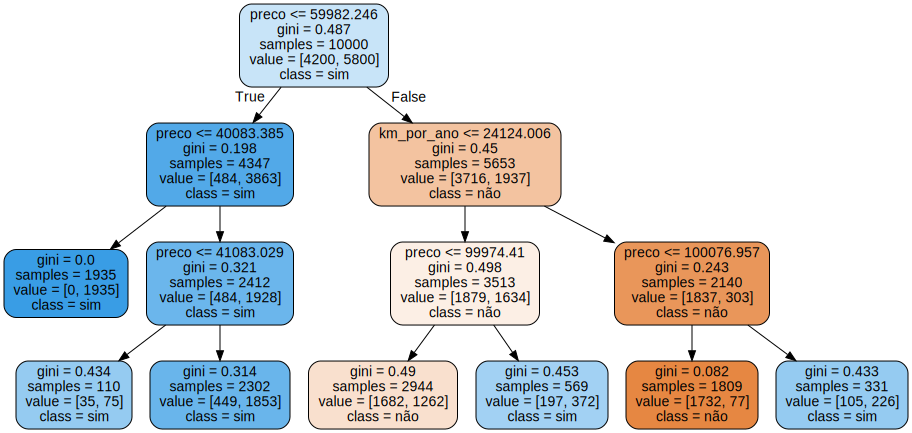

In [138]:
# Agora queremos usar no mundo real

feature = x_azar.columns
                        #  joga nenhum arquivo
dot_data = export_graphviz(melhor, out_file=None, filled = True, rounded = True, class_names=['não', 'sim'], feature_names= feature)
                                        # filled ---> preencher os retangulos de visualização

graph = graphviz.Source(dot_data)
graph